<a href="https://colab.research.google.com/github/Zeina-Shalaan/Cancer-DATA/blob/main/global_cancer_patients_2015_2024_Dataset_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving global_cancer_patients_2015_2024.csv to global_cancer_patients_2015_2024.csv


In [4]:
df =pd.read_csv('global_cancer_patients_2015_2024.csv')
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71.0,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34.0,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80.0,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40.0,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43.0,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


- check columns ( names, numbers , data types )

In [5]:
df.shape

(50000, 15)

- check for nan values
- drop any if found and test again to check

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  float64
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [7]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Country_Region,0
Year,0
Genetic_Risk,0
Air_Pollution,0
Alcohol_Use,0
Smoking,0
Obesity_Level,0


In [8]:
df = df[df['Gender'] != 'Other']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33505 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             33505 non-null  object 
 1   Age                    33505 non-null  float64
 2   Gender                 33505 non-null  object 
 3   Country_Region         33505 non-null  object 
 4   Year                   33505 non-null  int64  
 5   Genetic_Risk           33505 non-null  float64
 6   Air_Pollution          33505 non-null  float64
 7   Alcohol_Use            33505 non-null  float64
 8   Smoking                33505 non-null  float64
 9   Obesity_Level          33505 non-null  float64
 10  Cancer_Type            33505 non-null  object 
 11  Cancer_Stage           33505 non-null  object 
 12  Treatment_Cost_USD     33505 non-null  float64
 13  Survival_Years         33505 non-null  float64
 14  Target_Severity_Score  33505 non-null  float64
dtypes: floa

- describe the data
- Standardize units (e.g., convert sleep duration to consistent units)

In [10]:
df.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,33505.000000,33505.000000,33505.000000,33505.000000,33505.000000,33505.000000,33505.000000,33505.000000,33505.000000,33505.000000
mean,54.365916,2019.483779,4.999516,5.019681,4.998517,4.988885,4.990804,52328.501917,5.017941,4.952900
std,20.153346,2.872164,2.876429,2.889599,2.889678,2.881810,2.889941,27286.709054,2.887366,1.195847
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28629.640000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52192.320000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,75949.910000,7.500000,5.790000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,8.860000


In [16]:
s = df.sample(n=8400,random_state=42)
s.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
15112,PT0015112,87.0,Female,Brazil,2016,5.7,6.2,1.6,1.1,1.4,Cervical,Stage I,28407.05,1.2,4.10
22281,PT0022281,46.0,Male,Australia,2017,2.8,2.4,1.9,6.7,9.0,Breast,Stage I,99120.09,7.1,3.46
25116,PT0025116,80.0,Male,Pakistan,2023,4.6,9.5,4.3,7.9,2.6,Cervical,Stage IV,98110.51,9.5,4.87
25166,PT0025166,23.0,Male,India,2021,2.4,3.3,0.6,1.5,8.9,Colon,Stage I,49068.74,6.4,3.27
21637,PT0021637,55.0,Male,UK,2021,7.8,8.5,6.3,4.8,0.7,Colon,Stage III,83366.11,2.3,5.14


In [17]:
s.drop('Patient_ID', axis=1, inplace=True)

In [20]:
sample = s.sample(n=504, random_state=42)   #6%
sample.head()

,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
20509,66.0,Male,Canada,2019,4.8,8.8,3.1,6.4,5.4,Colon,Stage IV,41341.15,4.5,5.74
37737,58.0,Female,Pakistan,2016,6.9,6.9,4.7,5.2,3.7,Lung,Stage I,52495.06,6.6,5.48
4548,55.0,Male,Australia,2024,5.4,7.7,2.7,6.3,6.9,Breast,Stage 0,95380.11,8.2,4.68
35774,21.0,Female,Australia,2024,2.1,1.3,0.0,3.7,4.1,Colon,Stage I,23074.25,3.4,3.30
7492,78.0,Male,Russia,2019,9.9,3.9,1.7,2.9,6.1,Skin,Stage III,55232.91,3.6,4.91


- Summary statistics (mean, median, distributions).

In [21]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 20509 to 11548
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    504 non-null    float64
 1   Gender                 504 non-null    object 
 2   Country_Region         504 non-null    object 
 3   Year                   504 non-null    int64  
 4   Genetic_Risk           504 non-null    float64
 5   Air_Pollution          504 non-null    float64
 6   Alcohol_Use            504 non-null    float64
 7   Smoking                504 non-null    float64
 8   Obesity_Level          504 non-null    float64
 9   Cancer_Type            504 non-null    object 
 10  Cancer_Stage           504 non-null    object 
 11  Treatment_Cost_USD     504 non-null    float64
 12  Survival_Years         504 non-null    float64
 13  Target_Severity_Score  504 non-null    float64
dtypes: float64(9), int64(1), object(4)
memory usage: 59.1+ KB

In [22]:
sample.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,54.250000,2019.498016,4.998611,5.024405,4.967659,4.675794,4.982143,54126.041964,4.941667,4.849385
std,20.001019,2.760845,2.853490,2.879015,2.907419,2.960322,2.953961,27156.921848,2.903629,1.147800
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5828.690000,0.000000,0.950000
25%,37.000000,2017.000000,2.575000,2.600000,2.400000,2.000000,2.500000,32895.222500,2.600000,4.072500
50%,53.000000,2019.000000,4.800000,5.000000,5.100000,4.300000,5.000000,54242.240000,4.800000,4.840000
75%,71.250000,2022.000000,7.400000,7.500000,7.500000,7.225000,7.600000,78069.892500,7.425000,5.590000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99982.370000,10.000000,7.900000


In [23]:
sample.describe(percentiles=[.25, .5, .75])  # Include 90th and 99th percentiles

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,54.250000,2019.498016,4.998611,5.024405,4.967659,4.675794,4.982143,54126.041964,4.941667,4.849385
std,20.001019,2.760845,2.853490,2.879015,2.907419,2.960322,2.953961,27156.921848,2.903629,1.147800
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5828.690000,0.000000,0.950000
25%,37.000000,2017.000000,2.575000,2.600000,2.400000,2.000000,2.500000,32895.222500,2.600000,4.072500
50%,53.000000,2019.000000,4.800000,5.000000,5.100000,4.300000,5.000000,54242.240000,4.800000,4.840000
75%,71.250000,2022.000000,7.400000,7.500000,7.500000,7.225000,7.600000,78069.892500,7.425000,5.590000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99982.370000,10.000000,7.900000


In [24]:
mean_genetics=sample["Genetic_Risk"].mean()
mean_air = sample["Air_Pollution"].mean()
mean_alcohol = sample["Alcohol_Use"].mean()
mean_smoking = sample["Smoking"].mean()
mean_obesity = sample["Obesity_Level"].mean()
mean_cost= sample['Treatment_Cost_USD'].mean()

median_genetics=sample["Genetic_Risk"].median()
median_air = sample["Air_Pollution"].median()
median_alcohol = sample["Alcohol_Use"].median()
median_smoking = sample["Smoking"].median()
median_obesity = sample["Obesity_Level"].median()
median_cost= sample['Treatment_Cost_USD'].median()

mode_genetics=sample["Genetic_Risk"].mode()
mode_air = sample["Air_Pollution"].mode()
mode_alcohol = sample["Alcohol_Use"].mode()
mode_smoking = sample["Smoking"].mode()
mode_obesity= sample["Obesity_Level"].mode()
mode_cost= sample['Treatment_Cost_USD'].mode()


- Initial visualizations (histograms, box plots for key variables)

Box Plot of Obesity Level by Cancer Type

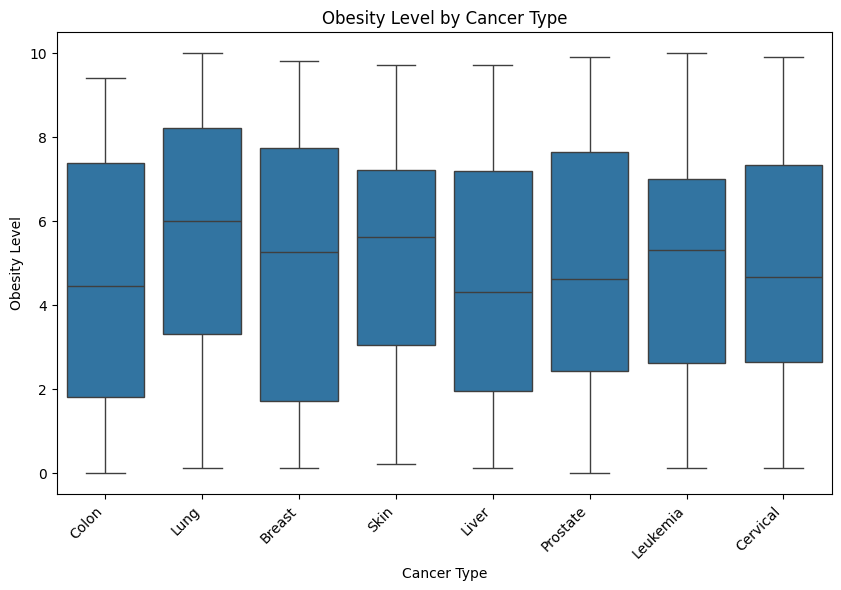

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cancer_Type', y='Obesity_Level', data=sample)
plt.title('Obesity Level by Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Obesity Level')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Age Distribution of Cancer Type

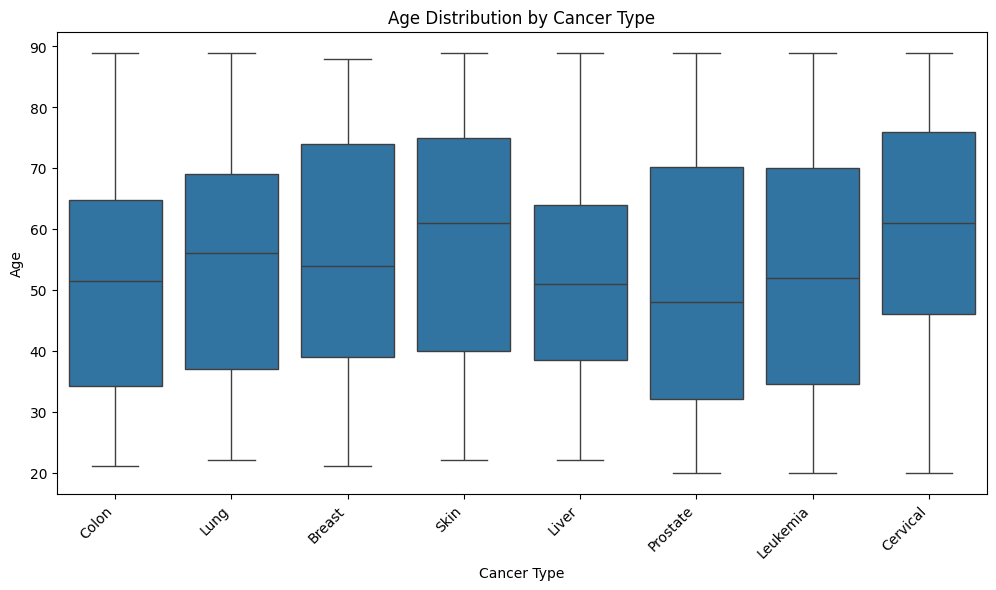

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cancer_Type', y='Age', data=sample)
plt.title('Age Distribution by Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Age')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Scatter Plot of Genetic Risk vs. Target_Severity_Score

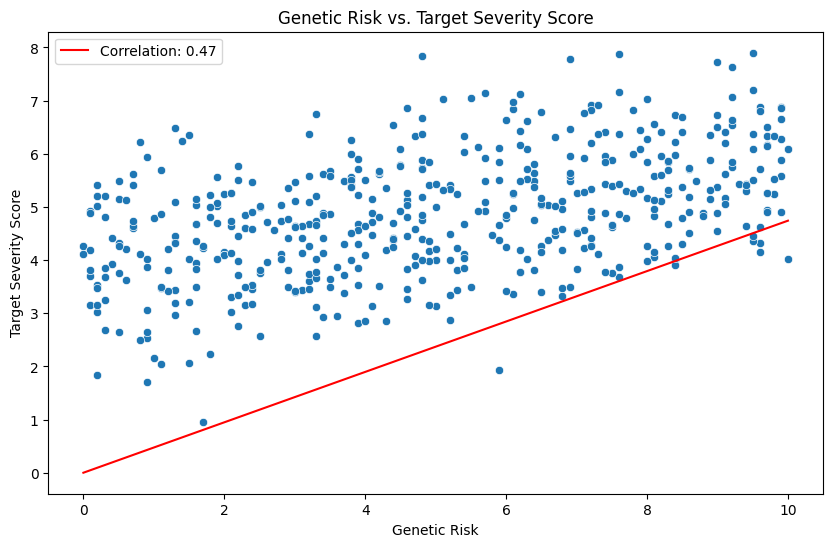

In [27]:
# Calculate the correlation coefficient
correlation_coefficient = sample['Genetic_Risk'].corr(sample['Target_Severity_Score'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Genetic_Risk', y='Target_Severity_Score', data=sample)
plt.title('Genetic Risk vs. Target Severity Score')
plt.xlabel('Genetic Risk')
plt.ylabel('Target Severity Score')

# Add the line of best fit
x = np.linspace(sample['Genetic_Risk'].min(), sample['Genetic_Risk'].max(), 100)
y = correlation_coefficient * x  # Simplified line equation based on correlation
plt.plot(x, y, color='red', label=f'Correlation: {correlation_coefficient:.2f}')

plt.legend()
plt.show()

boxplot Air_Pollution vs Cancer_Type

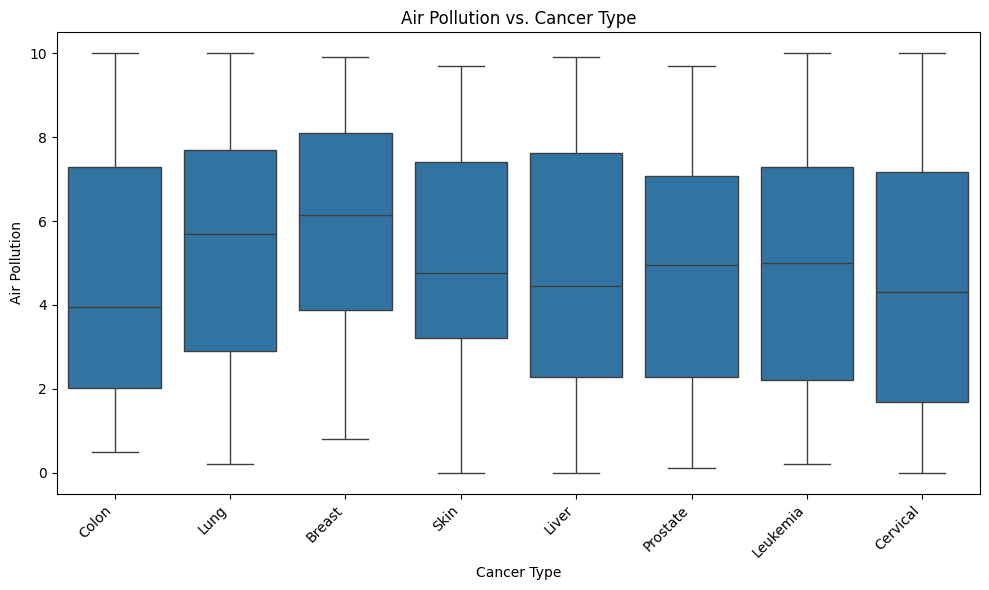

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cancer_Type', y='Air_Pollution', data=sample)
plt.title('Air Pollution vs. Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Air Pollution')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

Bar ChartAverage Treatment Cost by Country Region

<ipython-input-29-1ae8220fc3b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country_Region', y='Treatment_Cost_USD', data=region_cost,palette='deep')


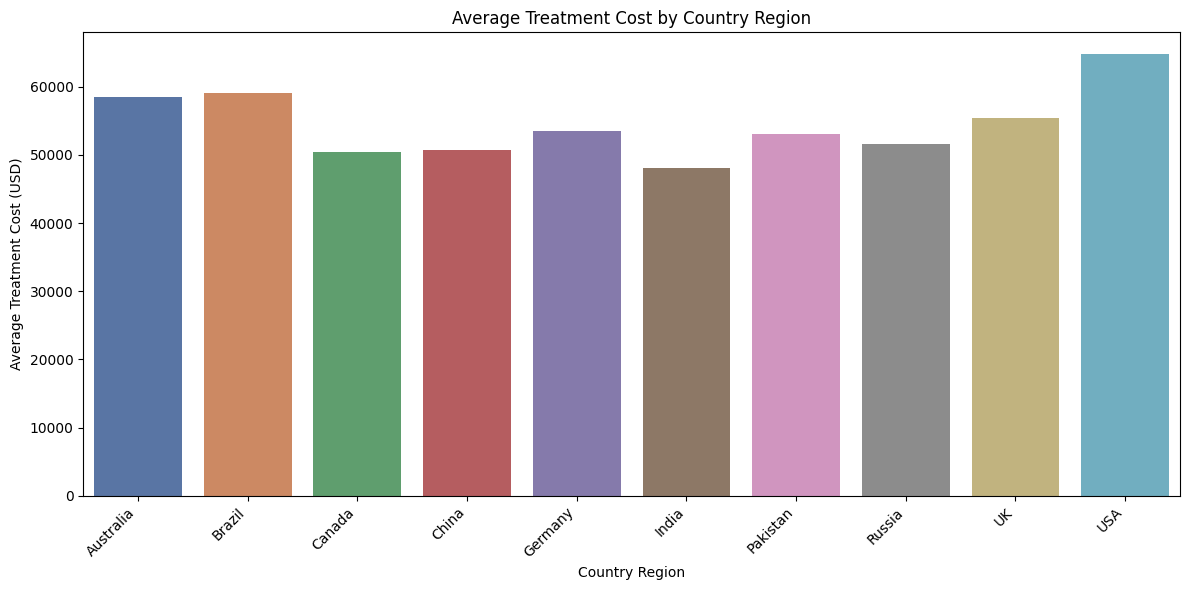

In [29]:
region_cost = sample.groupby('Country_Region')['Treatment_Cost_USD'].mean().reset_index()

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='Country_Region', y='Treatment_Cost_USD', data=region_cost,palette='deep')
plt.title('Average Treatment Cost by Country Region')
plt.xlabel('Country Region')
plt.ylabel('Average Treatment Cost (USD)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

male $ female and Cancer Types

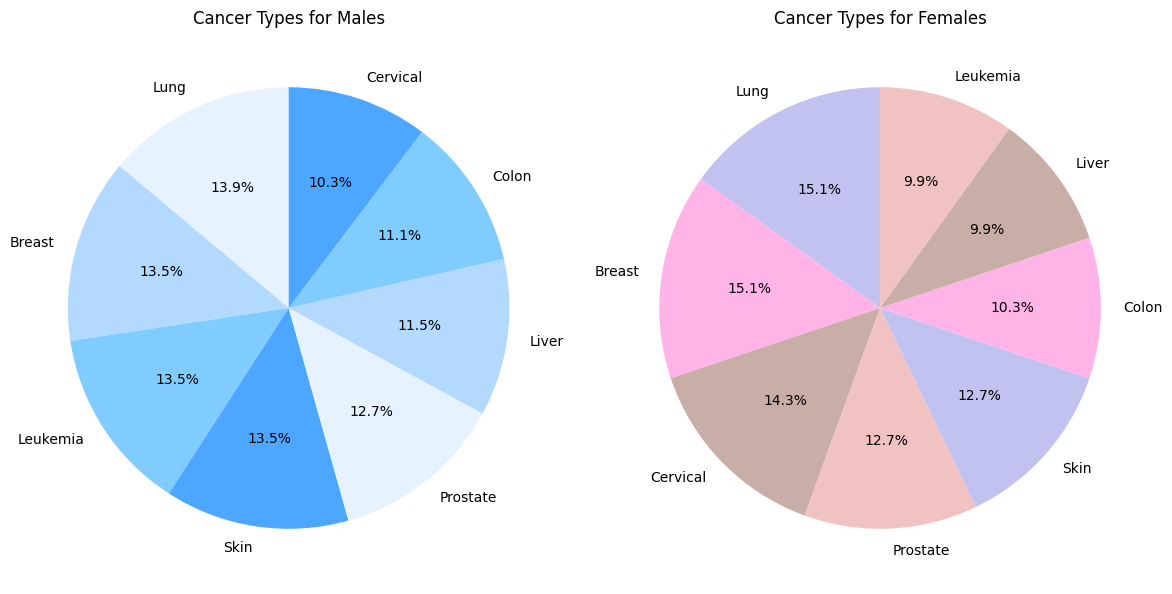

In [30]:
male_cancer_counts = sample[sample['Gender'] == 'Male']['Cancer_Type'].value_counts()
female_cancer_counts = sample[sample['Gender'] == 'Female']['Cancer_Type'].value_counts()

male_colors = ['#e6f2ff', '#b3d9ff', '#80ccff', '#4da6ff']
female_colors = ['#c2c2f0','#ffb3e6', '#c9ada7', '#f0c2c2']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


ax1.pie(male_cancer_counts, labels=male_cancer_counts.index, autopct='%1.1f%%', startangle=90, colors=male_colors)  # Add colors here
ax1.set_title('Cancer Types for Males')


ax2.pie(female_cancer_counts, labels=female_cancer_counts.index, autopct='%1.1f%%', startangle=90, colors=female_colors)  # Add colors here
ax2.set_title('Cancer Types for Females')

plt.tight_layout()
plt.show()

In [31]:
std_genertics = round(sample['Genetic_Risk'].std(),2)
std_air = round(sample['Air_Pollution'].std(),2)
std_alcohol = round(sample['Alcohol_Use'].std(),2)
std_smoking = round(sample['Smoking'].std(),2)
std_obesity = round(sample['Obesity_Level'].std(),2)
print("Standard Deviation of Genetic Risk:", std_genertics)
print("Standard Deviation of Air Pollution:", std_air)
print("Standard Deviation of Alcohol Use:", std_alcohol)
print("Standard Deviation of Smoking:", std_smoking)
print("Standard Deviation of Obesity Level:", std_obesity)

Standard Deviation of Genetic Risk: 2.85
Standard Deviation of Air Pollution: 2.88
Standard Deviation of Alcohol Use: 2.91
Standard Deviation of Smoking: 2.96
Standard Deviation of Obesity Level: 2.95


Bootstraping

[np.float64(56.323412698412696), np.float64(52.958333333333336), np.float64(53.007936507936506), np.float64(53.89484126984127), np.float64(54.9781746031746), np.float64(54.21230158730159), np.float64(55.345238095238095), np.float64(54.30555555555556), np.float64(54.08730158730159), np.float64(53.25198412698413)]


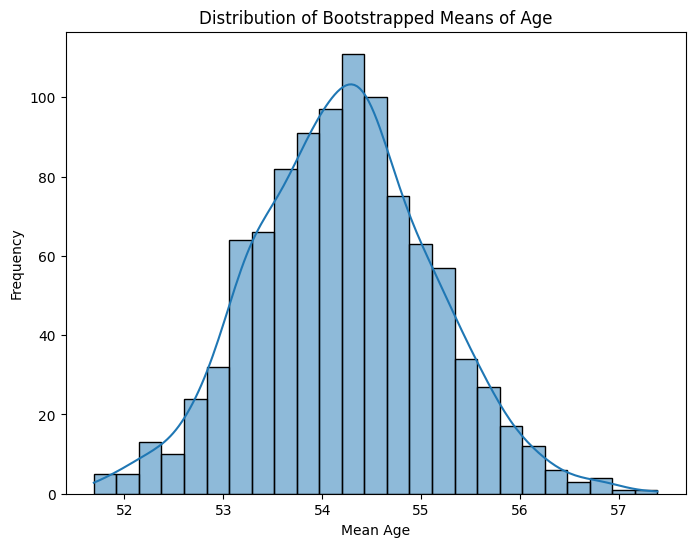

In [32]:
n_bootstrap = 1000  # Number of bootstrap samples
bootstrap_means = []

for _ in range(n_bootstrap):
    # Resample with replacement
    bootstrap_sample = sample['Age'].sample(frac=1, replace=True)
    # Calculate the mean and store it
    bootstrap_means.append(bootstrap_sample.mean())

# Show the first few bootstrapped means
print(bootstrap_means[:10])

# Plot the distribution of bootstrapped means
plt.figure(figsize=(8, 6))
sns.histplot(bootstrap_means, kde=True)
plt.title('Distribution of Bootstrapped Means of Age')
plt.xlabel('Mean Age')
plt.ylabel('Frequency')
plt.show()

[np.float64(4.882539682539683), np.float64(5.179563492063492), np.float64(4.865674603174604), np.float64(4.938095238095238), np.float64(4.961904761904761), np.float64(5.045436507936508), np.float64(5.001190476190476), np.float64(4.875992063492063), np.float64(4.923611111111111), np.float64(5.1345238095238095)]


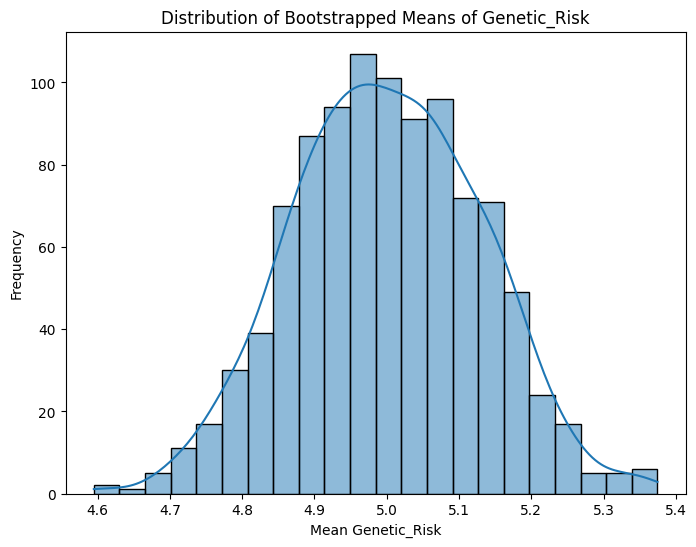

In [33]:
n_bootstrap = 1000  # Number of bootstrap samples
bootstrap_means = []

for _ in range(n_bootstrap):
    # Resample with replacement
    bootstrap_sample = sample['Genetic_Risk'].sample(frac=1, replace=True)
    # Calculate the mean and store it
    bootstrap_means.append(bootstrap_sample.mean())

# Show the first few bootstrapped means
print(bootstrap_means[:10])

# Plot the distribution of bootstrapped means
plt.figure(figsize=(8, 6))
sns.histplot(bootstrap_means, kde=True)
plt.title('Distribution of Bootstrapped Means of Genetic_Risk')
plt.xlabel('Mean Genetic_Risk')
plt.ylabel('Frequency')
plt.show()